In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
users_df = pd.read_csv("../../../cleaned_datasets/users_details_dataset_cleaned.csv")
anime_df = pd.read_csv("../../../cleaned_datasets/anime_dataset_cleaned.csv")
user_score_df = pd.read_csv("../../../cleaned_datasets/user_scores_cleaned.csv")

2. Seokwoo Park(50608072)

-------------------------------------------------------------------------------------------------------------------------------------------------------

1 - (a) Question 1: Is it possible to find out the differences between time to watch anime and other columns?<BR>
1 - (b) Hypothesis 1: I can make sure that developed countries are likely to have more time to watch anime due to their economic prosperity and advanced cultural development.<BR>

1 - (c') Operation 1: I can create a graph to compare them by collecting the average anime viewing times by country<BR>
1 - (c'') The result: Traditional economically developed countries do not rank in the top 10 in terms of anime viewing time. This suggests that anime may not be directly related to a country's economic level.<BR>

1 - (d') Operation 2: It is possoble to convert the cleaned Birthday column into age using 2024 which is the current year. Then, next step will be to group the rows by age and plot the results as a line graph. The graph will plotted ages from 20 to 40 in ascending order.<BR>
1 - (d'') The result: There was a trend of increasing daily viewing time in the age range of approximately 23 to 35.<BR>

-------------------------------------------------------------------------------------------------------------------------------------------------------

2 - (a) Question 2: When grouping columns based on age, What kind of correlation or trend can we derive from this?<BR>
2 - (b) Hypothesis 2: With the increasing variety of anime in recent years, viewing time and the number of viewers are likely to grow as age increases.<BR>

2 - (c') Operation 1: It is possible to display a graph that shows the average daily anime viewing time and the number of viewers for each age group by grouping rows by age. <BR>
2 - (c'') The result: There was a trend of increasing daily viewing time and the number of viwers in the age range of approximately 23 to 35.<BR>



2 - (d') Operation 2: After grouping the dataset by age, a line graph is plotted to examine the correlation between the number of people who stopped watching anime halfway and the number of people who planned to watch it.<BR>
2 - (d'') The result: It was found that the two figures were highest among people in their early twenties, and no correlation was observed in other age groups.<BR>
 

    Birthday  Days_Watched  Number    Dropped  Plan_To_Watch
0         20     38.084615      13  19.384615      27.230769
1         21     41.205556      18   6.833333      31.388889
2         22     78.095652      23  14.826087      89.347826
3         23     35.732203      59  15.932203      30.118644
4         24     44.533529     170   5.370588      35.294118
5         25     41.959013     527   5.747628      49.779886
6         26     41.627896    1545   6.403236      43.493204
7         27     41.627301    3260   7.092638      43.526687
8         28     45.817708    5715   7.792301      42.083990
9         29     48.758602    7952   8.552188      43.246982
10        30     53.175044    9729   9.331792      44.692055
11        31     55.371060   10630   8.924358      43.941293
12        32     57.847420   11164   9.585274      44.036456
13        33     59.970177   10626  10.303783      43.539243
14        34     59.346693   10145  10.135633      40.741449
15        35     77.0034

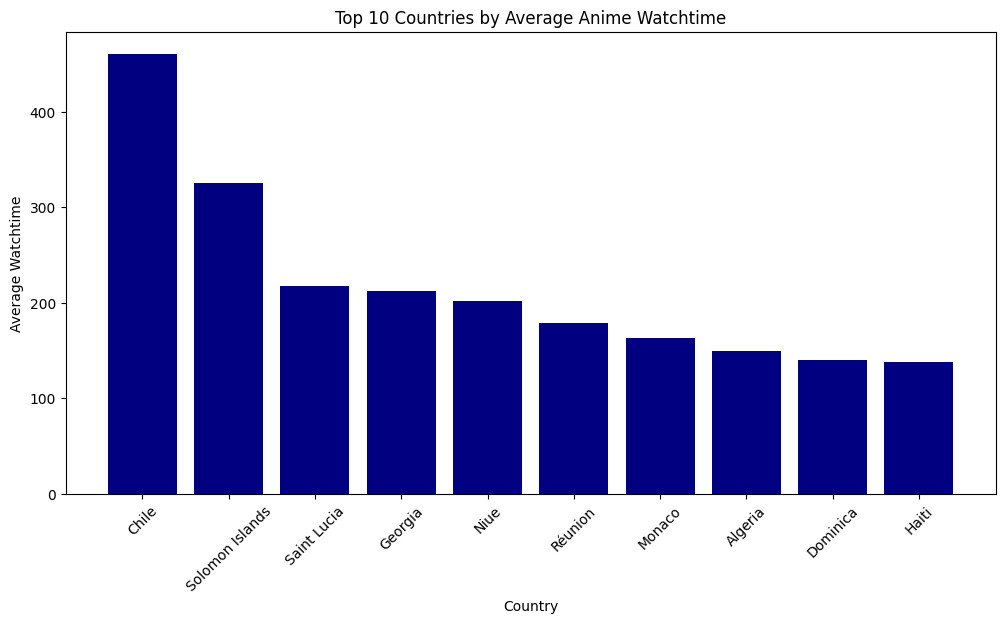

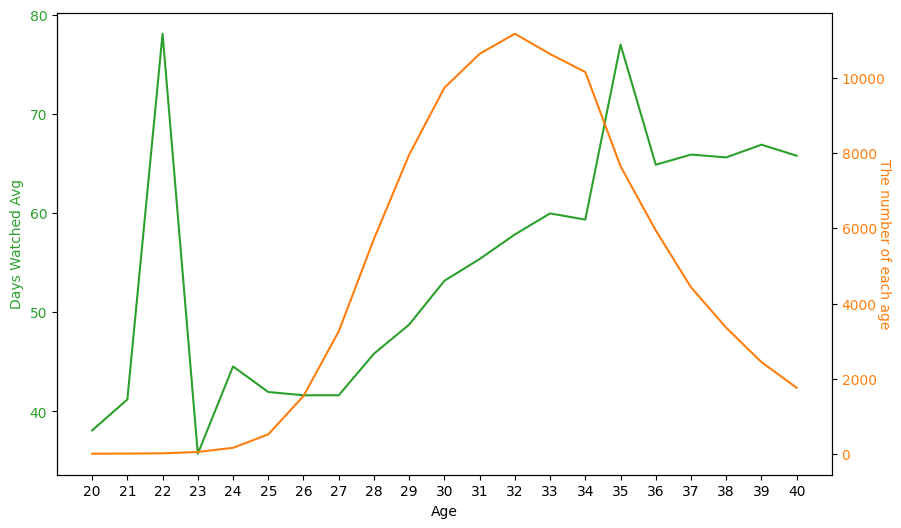

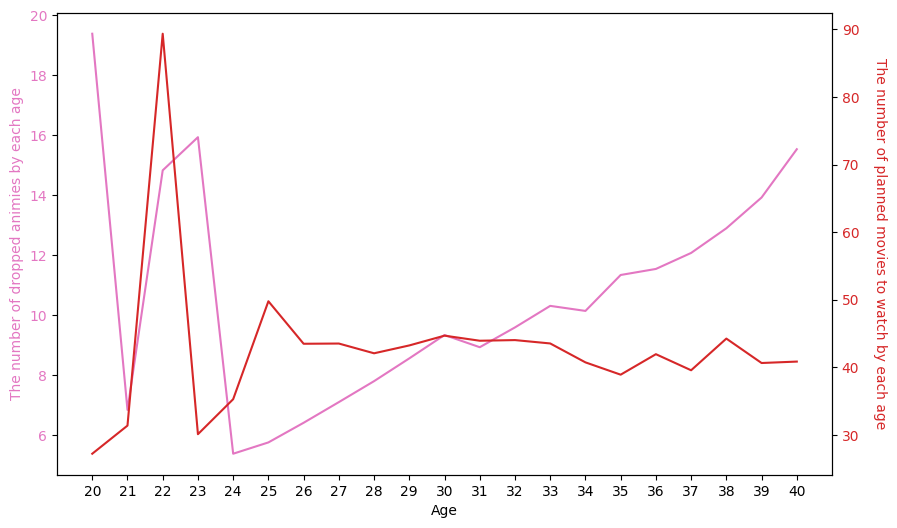

In [5]:
# Hypothesis 1 - Operation 1
country_watch_df = users_df.groupby('Location')['Days Watched'].mean().reset_index()
top_ten_countries = country_watch_df.sort_values(by='Days Watched', ascending=False).head(10)
# print(top_ten_countries)

plt.figure(figsize=(12, 6))
plt.bar(top_ten_countries['Location'], top_ten_countries['Days Watched'], color='Navy')
plt.title('Top 10 Countries by Average Anime Watchtime')
plt.xlabel('Country')
plt.ylabel('Average Watchtime')
plt.xticks(rotation=45) 

# -------------------------------------------------------------------------------------------------
# Operation 2 of Hypothesis 1 and Operation 1 of Hypothesis 2
from datetime import datetime

current_year = datetime.now().year
age_watch_df = users_df[['Birthday', 'Days Watched', 'Dropped', 'Plan to Watch']].copy()

for index, row in age_watch_df.iterrows():
    if pd.notnull(row['Birthday']):
        birth_year = int(row['Birthday'][0:4])
        # To caluculate an age by subtracting the birth year from the current year
        age_watch_df.at[index, 'Birthday'] = current_year - birth_year

age_grouped = age_watch_df[(age_watch_df['Birthday'] >= 20) & (age_watch_df['Birthday'] <= 40)].groupby('Birthday').agg(
    Days_Watched=('Days Watched', 'mean'),
    Number=('Birthday', 'size'),
    Dropped=('Dropped', 'mean'),
    Plan_To_Watch=('Plan to Watch', 'mean')
).reset_index()

print(age_grouped)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Age')
ax1.set_ylabel('Days Watched Avg', color='tab:green')
ax1.plot(age_grouped['Birthday'], age_grouped['Days_Watched'], color='tab:green', label='Days Watched Average')
ax1.tick_params(axis='y', labelcolor='tab:green')

ax2 = ax1.twinx()
ax2.set_ylabel('The number of each age', color='tab:orange', rotation=270)
ax2.plot(age_grouped['Birthday'], age_grouped['Number'], color='tab:orange', label='The number of each age')
ax2.tick_params(axis='y', labelcolor='tab:orange')
plt.xticks(age_grouped['Birthday'], rotation=45)
plt.show()

# -------------------------------------------------------------------------------------------------
# Operation 2 of Hypothesis 2

fig, ax3 = plt.subplots(figsize=(10, 6))

ax3.set_xlabel('Age')
ax3.set_ylabel('The number of dropped animies by each age', color='tab:pink')
ax3.plot(age_grouped['Birthday'], age_grouped['Dropped'], color='tab:pink', label='Days Watched Average')
ax3.tick_params(axis='y', labelcolor='tab:pink')

ax4 = ax3.twinx()
ax4.set_ylabel('The number of planned movies to watch by each age', color='tab:red', rotation=270, labelpad=20)
ax4.plot(age_grouped['Birthday'], age_grouped['Plan_To_Watch'], color='tab:red', label='The number of each age')
ax4.tick_params(axis='y', labelcolor='tab:red')
plt.xticks(age_grouped['Birthday'], rotation=45)
plt.show()


